In [32]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt

In [6]:
book = requests.get ("https://gutenberg.org/files/98/98-0.txt")

In [11]:
text = book.text

In [44]:
text[:2000]

'ï»¿The Project Gutenberg eBook of A Tale of Two Cities  by Charles Dickens  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever  You may copy it  give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org  If you are not located in the United States  you will have to check the laws of the country where you are located before using this eBook   Title  A Tale of Two Cities        A Story of the French Revolution  Author  Charles Dickens  Release Date  January  1994 [eBook #98] [Most recently updated  December 20  2020]  Language  English  Character set encoding  UTF-8  Produced by  Judith Boss and David Widger      START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES         A TALE OF TWO CITIES  A STORY OF THE FRENCH REVOLUTION  By Charles Dickens   CONTENTS        Book the First--Recalled to Life       CHAPTE

In [15]:
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

In [17]:
for st in strings2replace:
    regex_lines = re.compile(st)
    text = regex_lines.sub(' ', text)

In [27]:
for pm in ['.', ',', '!', '?', ':', ';', '(',  ')', '*']: text = text.replace(pm, ' ')

In [29]:
words = text.split()

(array([6.0640e+03, 2.5263e+04, 3.3568e+04, 2.5229e+04, 1.4791e+04,
        1.1016e+04, 9.1470e+03, 5.9010e+03, 3.9170e+03, 2.3900e+03,
        1.2730e+03, 7.7500e+02, 4.0800e+02, 1.7200e+02, 8.6000e+01,
        7.6000e+01, 1.3000e+01, 1.2000e+01, 1.4000e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <a list of 19 Patch objects>)

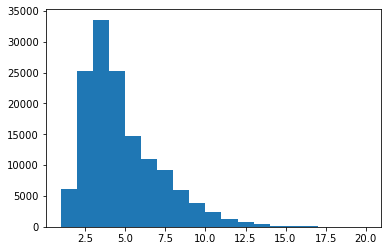

In [42]:
wordsl = [len(w) for w in words]
plt.hist(wordsl, bins=np.linspace(1,20,20))